In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import linalg as alg

from sklearn.decomposition import FactorAnalysis, PCA, TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

data = pd.read_excel (r'~/Dropbox/ROS/Arch_Plans_Paper/DataSheetsCleaned/Analysis_Of_catagorial_02.xlsx',sheet_name='Sheet1')


# Air - quality
df = pd.DataFrame(data, columns= ['Does the quality of air in this part of building have a negative effect on your work performance ?',
                                  'Do you have control over air condition system ?',
                                  'Do you feel sleepy or headache when you get to your work-space ?',
                                  'Health (especially cheast)',
                                  'Body activity',
                                  'How would you describe the ventilation and air quality of building  ',
                                  'Do you smell odor or unusual smell in your work-space ?'])

df.at[0, 'Body activity'] = 14
df.at[1, 'Body activity'] = 5
df.at[2, 'Body activity'] = 26

#df.dtypes
#df['CO2 at any moment (PPM)'] = pd.to_numeric(df['CO2 at any moment (PPM)'], errors='coerce') 
#df.dtypes
#df = df.dropna(inplace=True)
#df.dtypes
feature_names = df.iloc[0].T

#print (df)
df.head()

u, s, vh = alg.svd(df, full_matrices=False, compute_uv=True, hermitian=False)

TruncatedSVD(n_components=7, n_iter=11, random_state=42)
u.shape, s.shape, vh.shape

print('U=', np.size(u))
print('s=', s)

x = StandardScaler().fit_transform(df)
#print(x)
covariance_matrix = np.cov(x.T)
#new_covariance_matrix = covariance_matrix[~np.isnan(covariance_matrix)]

print(covariance_matrix)

pca = PCA(n_components=1)

pca.fit_transform(covariance_matrix)


eigen_values, eigen_vectors = alg.eig(covariance_matrix)
print("Eigenvector: \n",eigen_vectors,"\n")
print("Eigenvalues: \n", eigen_values, "\n")

#principalDf = pd.DataFrame(data = pca, columns = ['pca1', 'pca2'])
    
print(feature_names)

ax = plt.axes()

im = ax.imshow(np.corrcoef(x.T), cmap="RdBu_r", vmin=-1, vmax=1)
#featurenames = feature_names.index.tolist()
featurenames = ['Does the quality of air in this part of building have a negative effect on your work performance ?',
                'Do you have control over air condition system ?',
                'Do you feel sleepy or headache when you get to your work-space ?',
                'Health (especially cheast)',
                'Body activity ',
                'How would you describe the ventilation and air quality of building  ',
                'Do you smell odor or unusual smell in your work-space ?']
print(len(featurenames))

ax.set_xticks([0, 1, 2, 3, 4, 5, 6])
ax.set_xticklabels(featurenames , rotation=90)
ax.set_yticks([0, 1, 2, 3, 4, 5, 6])
ax.set_yticklabels(featurenames )
print(type(feature_names))
plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
ax.set_title("IEQ preference correlation matrix")
plt.tight_layout()

n_comps = 7

methods = [('PCA', PCA()),
           ('Unrotated FA', FactorAnalysis()),
           ('Varimax FA', FactorAnalysis(rotation='varimax'))]
fig, axes = plt.subplots(ncols=len(methods), figsize=(20, 16))

for ax, (method, fa) in zip(axes, methods):
    fa.set_params(n_components = n_comps)
    fa.fit(x)

    components = fa.components_.T
    print("\n\n %s :\n" % method)
    print(components)

    vmax = np.abs(components).max()
    ax.imshow(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax)
    ax.set_yticks(np.arange(len(feature_names)))
    print(np.arange(len(feature_names)))
    if ax.is_first_col():
        ax.set_yticklabels(featurenames)
    else:
        ax.set_yticklabels([])
    ax.set_title(str(method))
    ax.set_xticks([0, 1, 2, 3, 4, 5, 6])
    ax.set_xticklabels(featurenames,rotation=90)
fig.suptitle("Factors")
plt.tight_layout()
plt.show()



LinAlgError: SVD did not converge

U= 9
s= [69.54995356 30.5356871  12.85985122]
[[ 1.5         1.30260189 -0.04808779  0.36199794 -1.46413471 -1.08627628
   1.06823596]
 [ 1.30260189  1.5         0.70165137  1.03616808 -1.10977987 -0.43039901
   0.40549982]
 [-0.04808779  0.70165137  1.5         1.44331059  0.37282186  1.06870262
  -1.08673469]
 [ 0.36199794  1.03616808  1.44331059  1.5        -0.03692828  0.74168227
  -0.76410561]
 [-1.46413471 -1.10977987  0.37282186 -0.03692828  1.5         1.28515044
  -1.27158884]
 [-1.08627628 -0.43039901  1.06870262  0.74168227  1.28515044  1.5
  -1.49977595]
 [ 1.06823596  0.40549982 -1.08673469 -0.76410561 -1.27158884 -1.49977595
   1.5       ]]
Eigenvector: 
 [[-0.41900264+0.j          0.30855848+0.j          0.33896488+0.j
  -0.00816213+0.00423617j -0.00816213-0.00423617j  0.07348068+0.j
   0.05517819+0.j        ]
 [-0.23710116+0.j          0.51873064+0.j         -0.68458349+0.j
  -0.21599564+0.1706781j  -0.21599564-0.1706781j  -0.18421612+0.j
   0.15365263+0.j        ]
 [ 0

/tmp/ipykernel_28332/3732104712.py:60: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


ValueError: n_components=7 must be between 0 and min(n_samples, n_features)=3 with svd_solver='full'

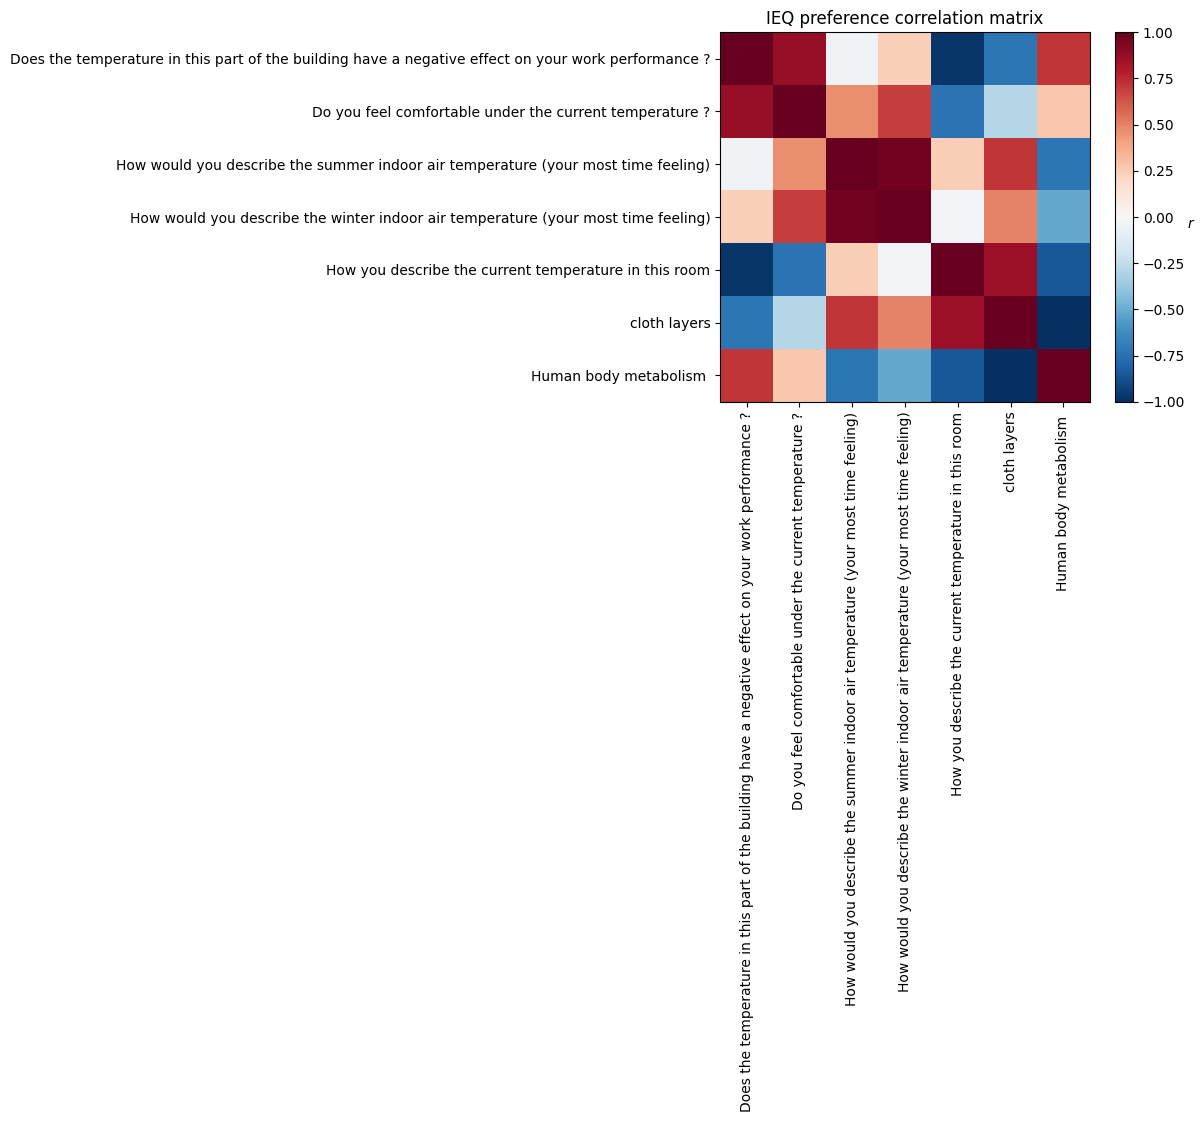

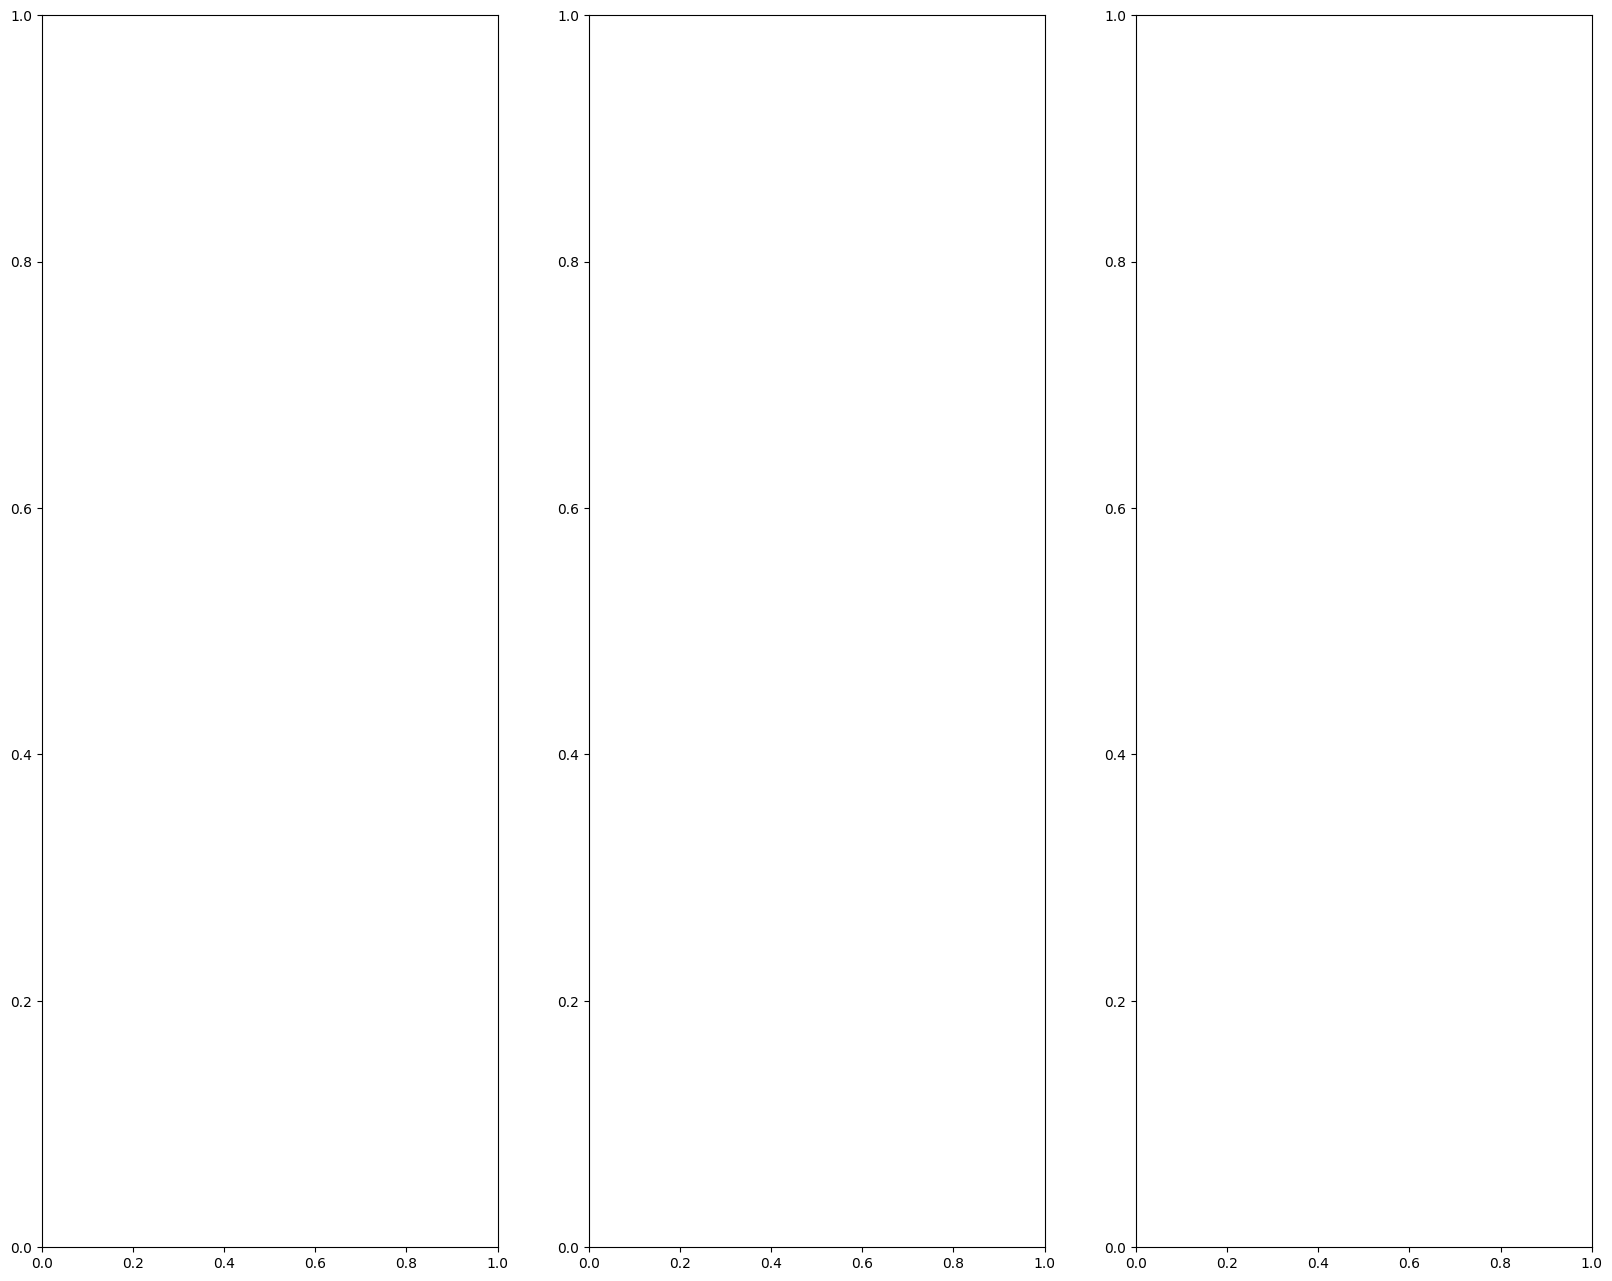

In [104]:
# Thermal comfort
df2 = pd.DataFrame(data, columns= ['Does the temperature in this part of the building have a negative effect on your work performance ?',
                                  'Do you feel comfortable under the current temperature ?',
                                  'How would you describe the summer indoor air temperature (your most time feeling)',
                                  'How would you describe the winter indoor air temperature (your most time feeling)',
                                  'How you describe the current temperature in this room',
                                  'cloth layers',
                                  'Human body metabolism '])

feature_names = df2.iloc[0].T

u, s, vh = alg.svd(df2, full_matrices=False, compute_uv=True, hermitian=False)

TruncatedSVD(n_components=7, n_iter=11, random_state=42)
u.shape, s.shape, vh.shape

print('U=', np.size(u))
print('s=', s)

x = StandardScaler().fit_transform(df)
#print(x)
covariance_matrix = np.cov(x.T)
#new_covariance_matrix = covariance_matrix[~np.isnan(covariance_matrix)]

print(covariance_matrix)

pca = PCA(n_components=1)

pca.fit_transform(covariance_matrix)


eigen_values, eigen_vectors = alg.eig(covariance_matrix)
print("Eigenvector: \n",eigen_vectors,"\n")
print("Eigenvalues: \n", eigen_values, "\n")

#principalDf = pd.DataFrame(data = pca, columns = ['pca1', 'pca2'])
    
print(feature_names)

ax = plt.axes()

im = ax.imshow(np.corrcoef(x.T), cmap="RdBu_r", vmin=-1, vmax=1)
#featurenames = feature_names.index.tolist()
featurenames = ['Does the temperature in this part of the building have a negative effect on your work performance ?',
                                  'Do you feel comfortable under the current temperature ?',
                                  'How would you describe the summer indoor air temperature (your most time feeling)',
                                  'How would you describe the winter indoor air temperature (your most time feeling)',
                                  'How you describe the current temperature in this room',
                                  'cloth layers',
                                  'Human body metabolism ']
print(len(featurenames))

ax.set_xticks([0, 1, 2, 3, 4, 5, 6])
ax.set_xticklabels(featurenames , rotation=90)
ax.set_yticks([0, 1, 2, 3, 4, 5, 6])
ax.set_yticklabels(featurenames )
print(type(feature_names))
plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
ax.set_title("IEQ preference correlation matrix")
plt.tight_layout()

n_comps = 7

methods = [('PCA', PCA()),
           ('Unrotated FA', FactorAnalysis()),
           ('Varimax FA', FactorAnalysis(rotation='varimax'))]
fig, axes = plt.subplots(ncols=len(methods), figsize=(20, 16))

for ax, (method, fa) in zip(axes, methods):
    fa.set_params(n_components = n_comps)
    fa.fit(x)

    components = fa.components_.T
    print("\n\n %s :\n" % method)
    print(components)

    vmax = np.abs(components).max()
    ax.imshow(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax)
    ax.set_yticks(np.arange(len(feature_names)))
    print(np.arange(len(feature_names)))
    if ax.is_first_col():
        ax.set_yticklabels(featurenames)
    else:
        ax.set_yticklabels([])
    ax.set_title(str(method))
    ax.set_xticks([0, 1, 2, 3, 4, 5, 6])
    ax.set_xticklabels(featurenames,rotation=90)
fig.suptitle("Factors")
plt.tight_layout()
plt.show()



U= 9
s= [56.26915547 31.25587535 17.28734794]
[[ 1.5         1.30260189 -0.04808779  0.36199794 -1.46413471 -1.08627628
   1.06823596]
 [ 1.30260189  1.5         0.70165137  1.03616808 -1.10977987 -0.43039901
   0.40549982]
 [-0.04808779  0.70165137  1.5         1.44331059  0.37282186  1.06870262
  -1.08673469]
 [ 0.36199794  1.03616808  1.44331059  1.5        -0.03692828  0.74168227
  -0.76410561]
 [-1.46413471 -1.10977987  0.37282186 -0.03692828  1.5         1.28515044
  -1.27158884]
 [-1.08627628 -0.43039901  1.06870262  0.74168227  1.28515044  1.5
  -1.49977595]
 [ 1.06823596  0.40549982 -1.08673469 -0.76410561 -1.27158884 -1.49977595
   1.5       ]]
Eigenvector: 
 [[-0.41900264+0.j          0.30855848+0.j          0.33896488+0.j
  -0.00816213+0.00423617j -0.00816213-0.00423617j  0.07348068+0.j
   0.05517819+0.j        ]
 [-0.23710116+0.j          0.51873064+0.j         -0.68458349+0.j
  -0.21599564+0.1706781j  -0.21599564-0.1706781j  -0.18421612+0.j
   0.15365263+0.j        ]
 [ 0

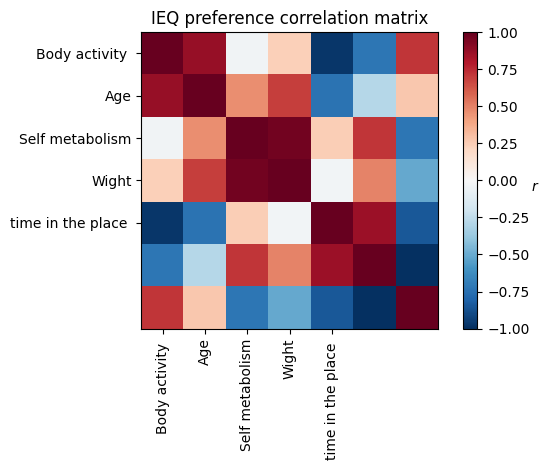

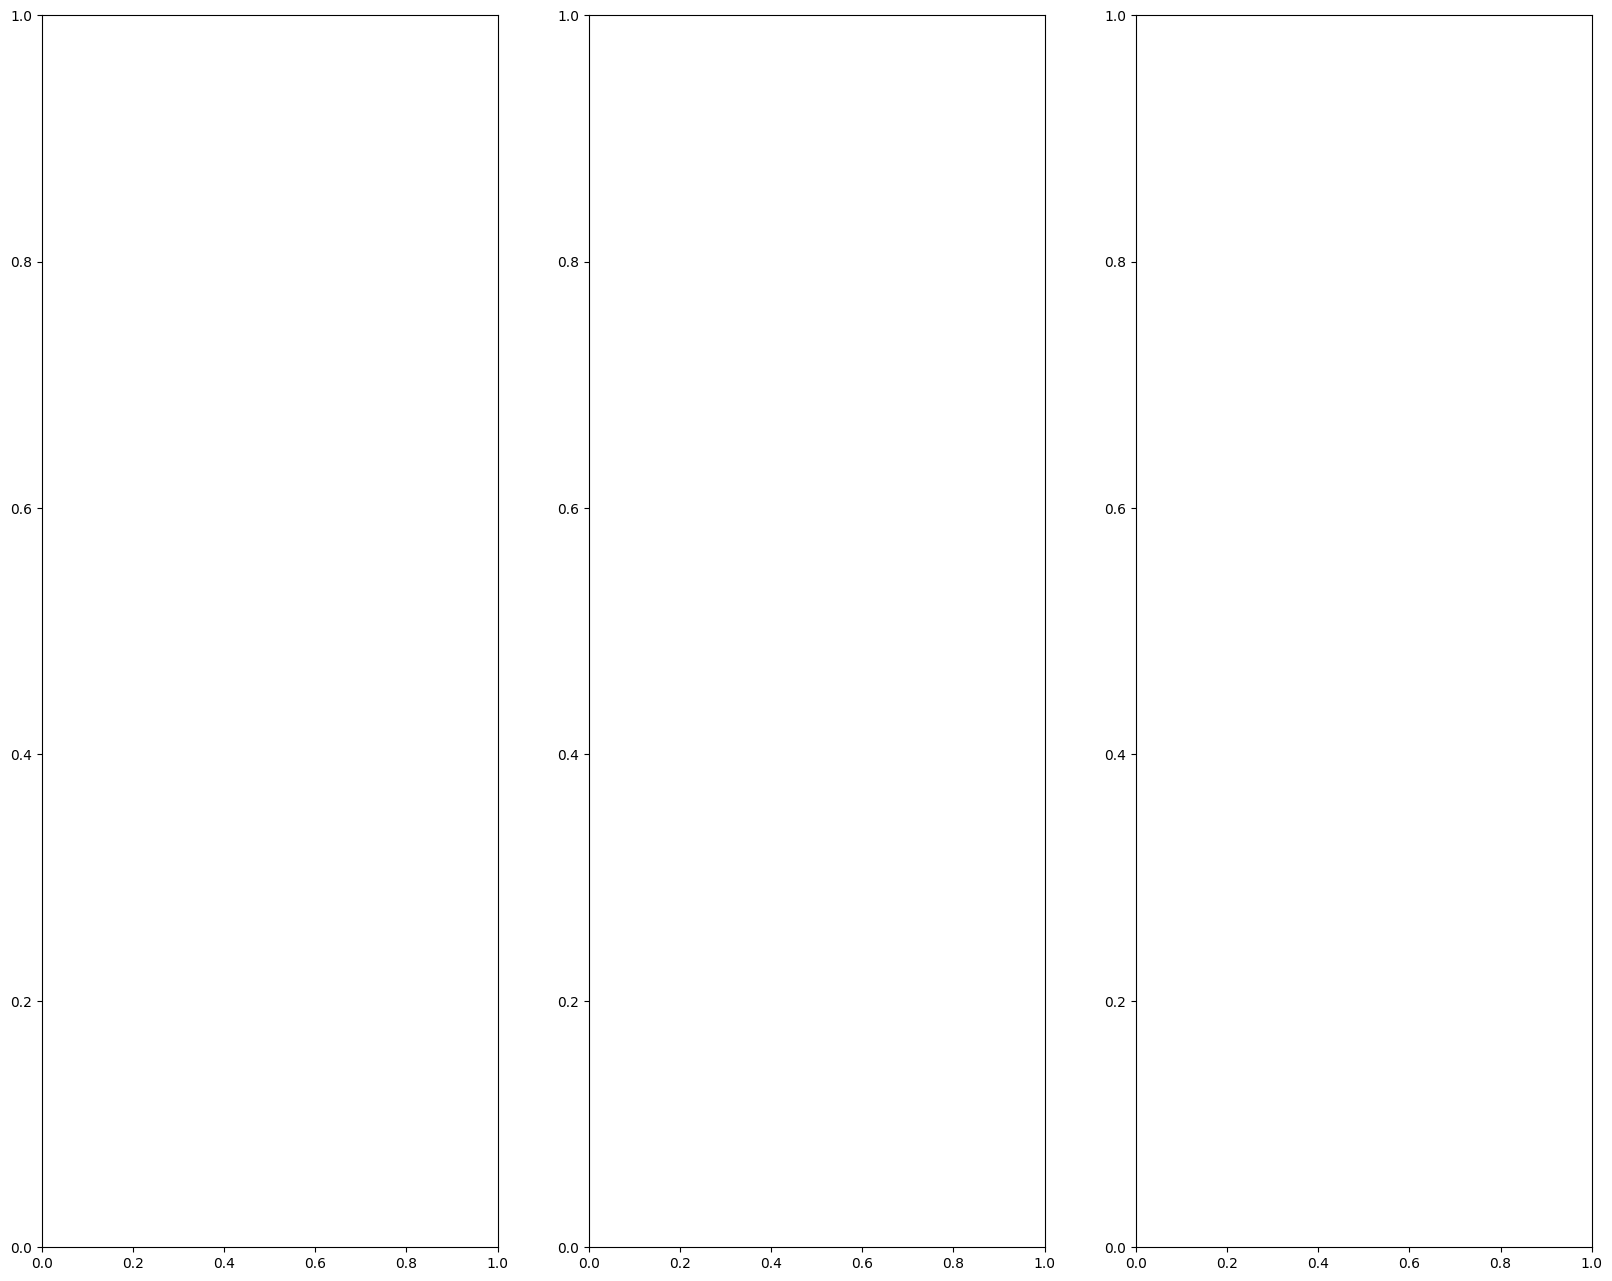

In [105]:
#Body - Metapolism
df3 = pd.DataFrame(data, columns= ['Body activity ',
                                  'Age',
                                  'Self metabolism',
                                  'Wight',
                                  'time in the place '])

feature_names = df3.iloc[0].T

u, s, vh = alg.svd(df3, full_matrices=False, compute_uv=True, hermitian=False)

TruncatedSVD(n_components=5, n_iter=11, random_state=42)
u.shape, s.shape, vh.shape

print('U=', np.size(u))
print('s=', s)

x = StandardScaler().fit_transform(df)
#print(x)
covariance_matrix = np.cov(x.T)
#new_covariance_matrix = covariance_matrix[~np.isnan(covariance_matrix)]

print(covariance_matrix)

pca = PCA(n_components=1)

pca.fit_transform(covariance_matrix)


eigen_values, eigen_vectors = alg.eig(covariance_matrix)
print("Eigenvector: \n",eigen_vectors,"\n")
print("Eigenvalues: \n", eigen_values, "\n")

#principalDf = pd.DataFrame(data = pca, columns = ['pca1', 'pca2'])
    
#print(feature_names)

ax = plt.axes()

im = ax.imshow(np.corrcoef(x.T), cmap="RdBu_r", vmin=-1, vmax=1)
#featurenames = feature_names.index.tolist()
featurenames = ['Body activity ',
                'Age',
                'Self metabolism',
                'Wight',
                'time in the place ']
print(len(featurenames))
print(feature_names)

ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels(featurenames , rotation=90)
ax.set_yticks([0, 1, 2, 3, 4])
ax.set_yticklabels(featurenames )
print(type(feature_names))
plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
ax.set_title("IEQ preference correlation matrix")
plt.tight_layout()

n_comps = 5

methods = [('PCA', PCA()),
           ('Unrotated FA', FactorAnalysis()),
           ('Varimax FA', FactorAnalysis(rotation='varimax'))]
fig, axes = plt.subplots(ncols=len(methods), figsize=(20, 16))

plt.show()



U= 9
s= [63.42055235 10.67162559  9.21682955]
[[ 1.5         1.30260189 -0.04808779  0.36199794 -1.46413471 -1.08627628
   1.06823596]
 [ 1.30260189  1.5         0.70165137  1.03616808 -1.10977987 -0.43039901
   0.40549982]
 [-0.04808779  0.70165137  1.5         1.44331059  0.37282186  1.06870262
  -1.08673469]
 [ 0.36199794  1.03616808  1.44331059  1.5        -0.03692828  0.74168227
  -0.76410561]
 [-1.46413471 -1.10977987  0.37282186 -0.03692828  1.5         1.28515044
  -1.27158884]
 [-1.08627628 -0.43039901  1.06870262  0.74168227  1.28515044  1.5
  -1.49977595]
 [ 1.06823596  0.40549982 -1.08673469 -0.76410561 -1.27158884 -1.49977595
   1.5       ]]
Eigenvector: 
 [[-0.41900264+0.j          0.30855848+0.j          0.33896488+0.j
  -0.00816213+0.00423617j -0.00816213-0.00423617j  0.07348068+0.j
   0.05517819+0.j        ]
 [-0.23710116+0.j          0.51873064+0.j         -0.68458349+0.j
  -0.21599564+0.1706781j  -0.21599564-0.1706781j  -0.18421612+0.j
   0.15365263+0.j        ]
 [ 0

/tmp/ipykernel_28332/2540877630.py:60: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


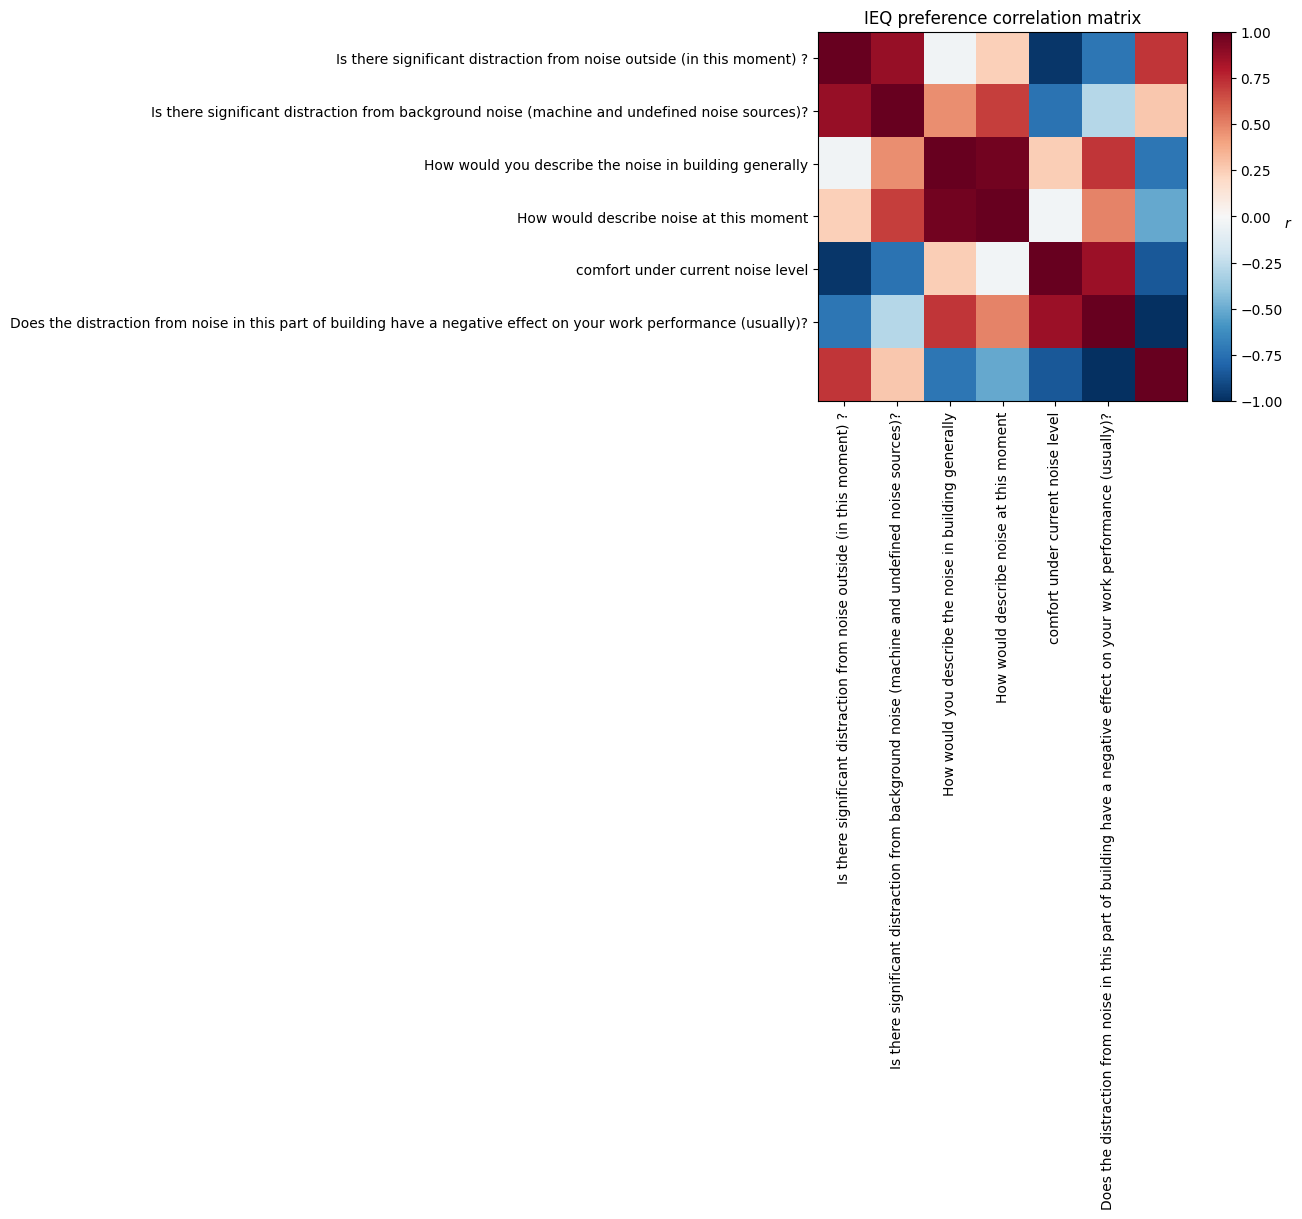

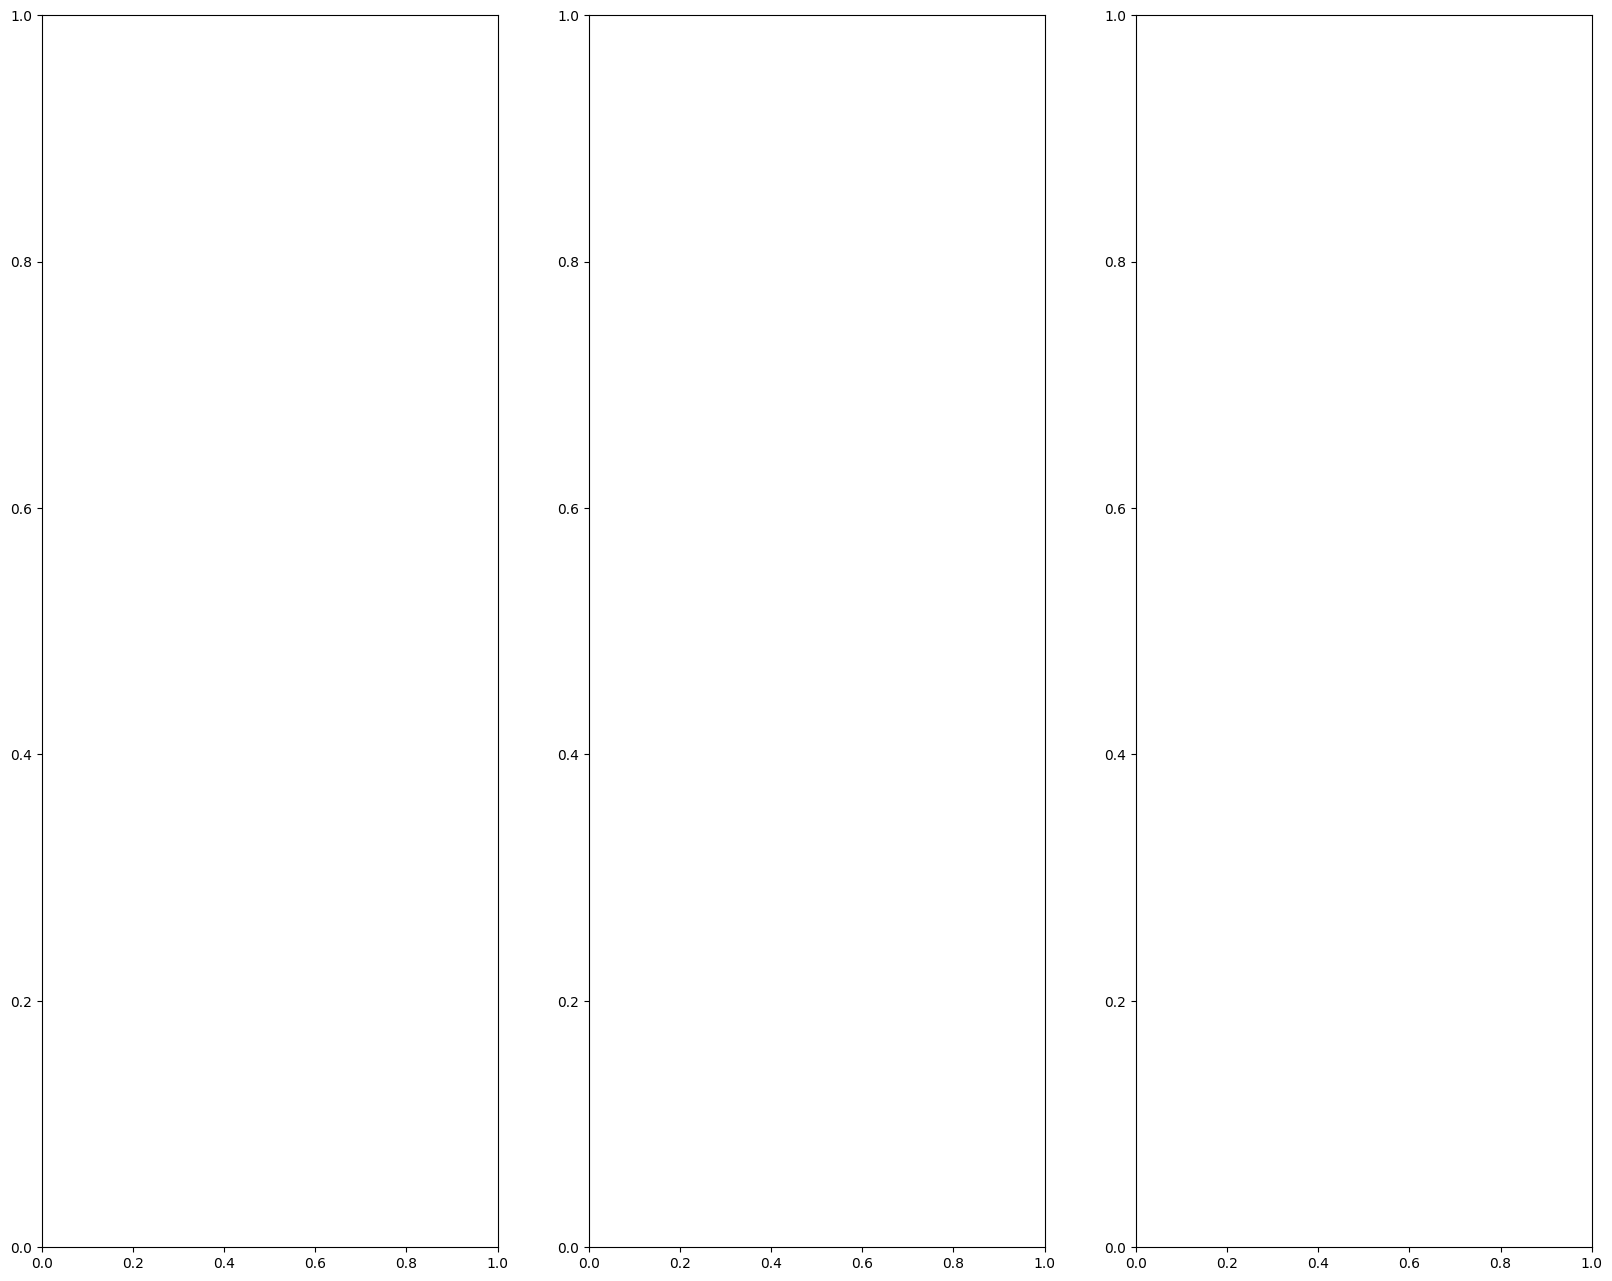

In [106]:
#Sound quality (comfort)
df4 = pd.DataFrame(data, columns= ['Is there significant distraction from noise outside (in this moment) ?',
                                  'Is there significant distraction from background noise (machine and undefined noise sources)?',
                                  'How would you describe the noise in building generally',
                                  'How would describe noise at this moment',
                                  'comfort under current noise level',
                                  'Does the distraction from noise in this part of building have a negative effect on your work performance (usually)?'])

feature_names = df4.iloc[0].T

u, s, vh = alg.svd(df4, full_matrices=False, compute_uv=True, hermitian=False)

TruncatedSVD(n_components=6, n_iter=11, random_state=42)
u.shape, s.shape, vh.shape

print('U=', np.size(u))
print('s=', s)

x = StandardScaler().fit_transform(df)
#print(x)
covariance_matrix = np.cov(x.T)
#new_covariance_matrix = covariance_matrix[~np.isnan(covariance_matrix)]

print(covariance_matrix)

pca = PCA(n_components=1)

pca.fit_transform(covariance_matrix)


eigen_values, eigen_vectors = alg.eig(covariance_matrix)
print("Eigenvector: \n",eigen_vectors,"\n")
print("Eigenvalues: \n", eigen_values, "\n")

#principalDf = pd.DataFrame(data = pca, columns = ['pca1', 'pca2'])
    
#print(feature_names)

ax = plt.axes()

im = ax.imshow(np.corrcoef(x.T), cmap="RdBu_r", vmin=-1, vmax=1)
#featurenames = feature_names.index.tolist()
featurenames = ['Is there significant distraction from noise outside (in this moment) ?',
                'Is there significant distraction from background noise (machine and undefined noise sources)?',
                'How would you describe the noise in building generally',
                'How would describe noise at this moment',
                'comfort under current noise level',
                'Does the distraction from noise in this part of building have a negative effect on your work performance (usually)?']

print(len(featurenames))
print(feature_names)

ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_xticklabels(featurenames , rotation=90)
ax.set_yticks([0, 1, 2, 3, 4, 5])
ax.set_yticklabels(featurenames )
print(type(feature_names))
plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
ax.set_title("IEQ preference correlation matrix")
plt.tight_layout()

n_comps = 6

methods = [('PCA', PCA()),
           ('Unrotated FA', FactorAnalysis()),
           ('Varimax FA', FactorAnalysis(rotation='varimax'))]
fig, axes = plt.subplots(ncols=len(methods), figsize=(20, 16))


   Does the quality of light in this part of building have a negative effect on your work performance ? (do you feel you need more light in your space)  \
0                                                 16                                                                                                      
1                                                 21                                                                                                      
2                                                  8                                                                                                      

   Discribe the current light level   Comfort under the current light level  \
0                                  4                                     20   
1                                  2                                      3   
2                                  7                                      8   

   Comfort under the current light Color  Building cleanness  

/tmp/ipykernel_28332/3044292067.py:58: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


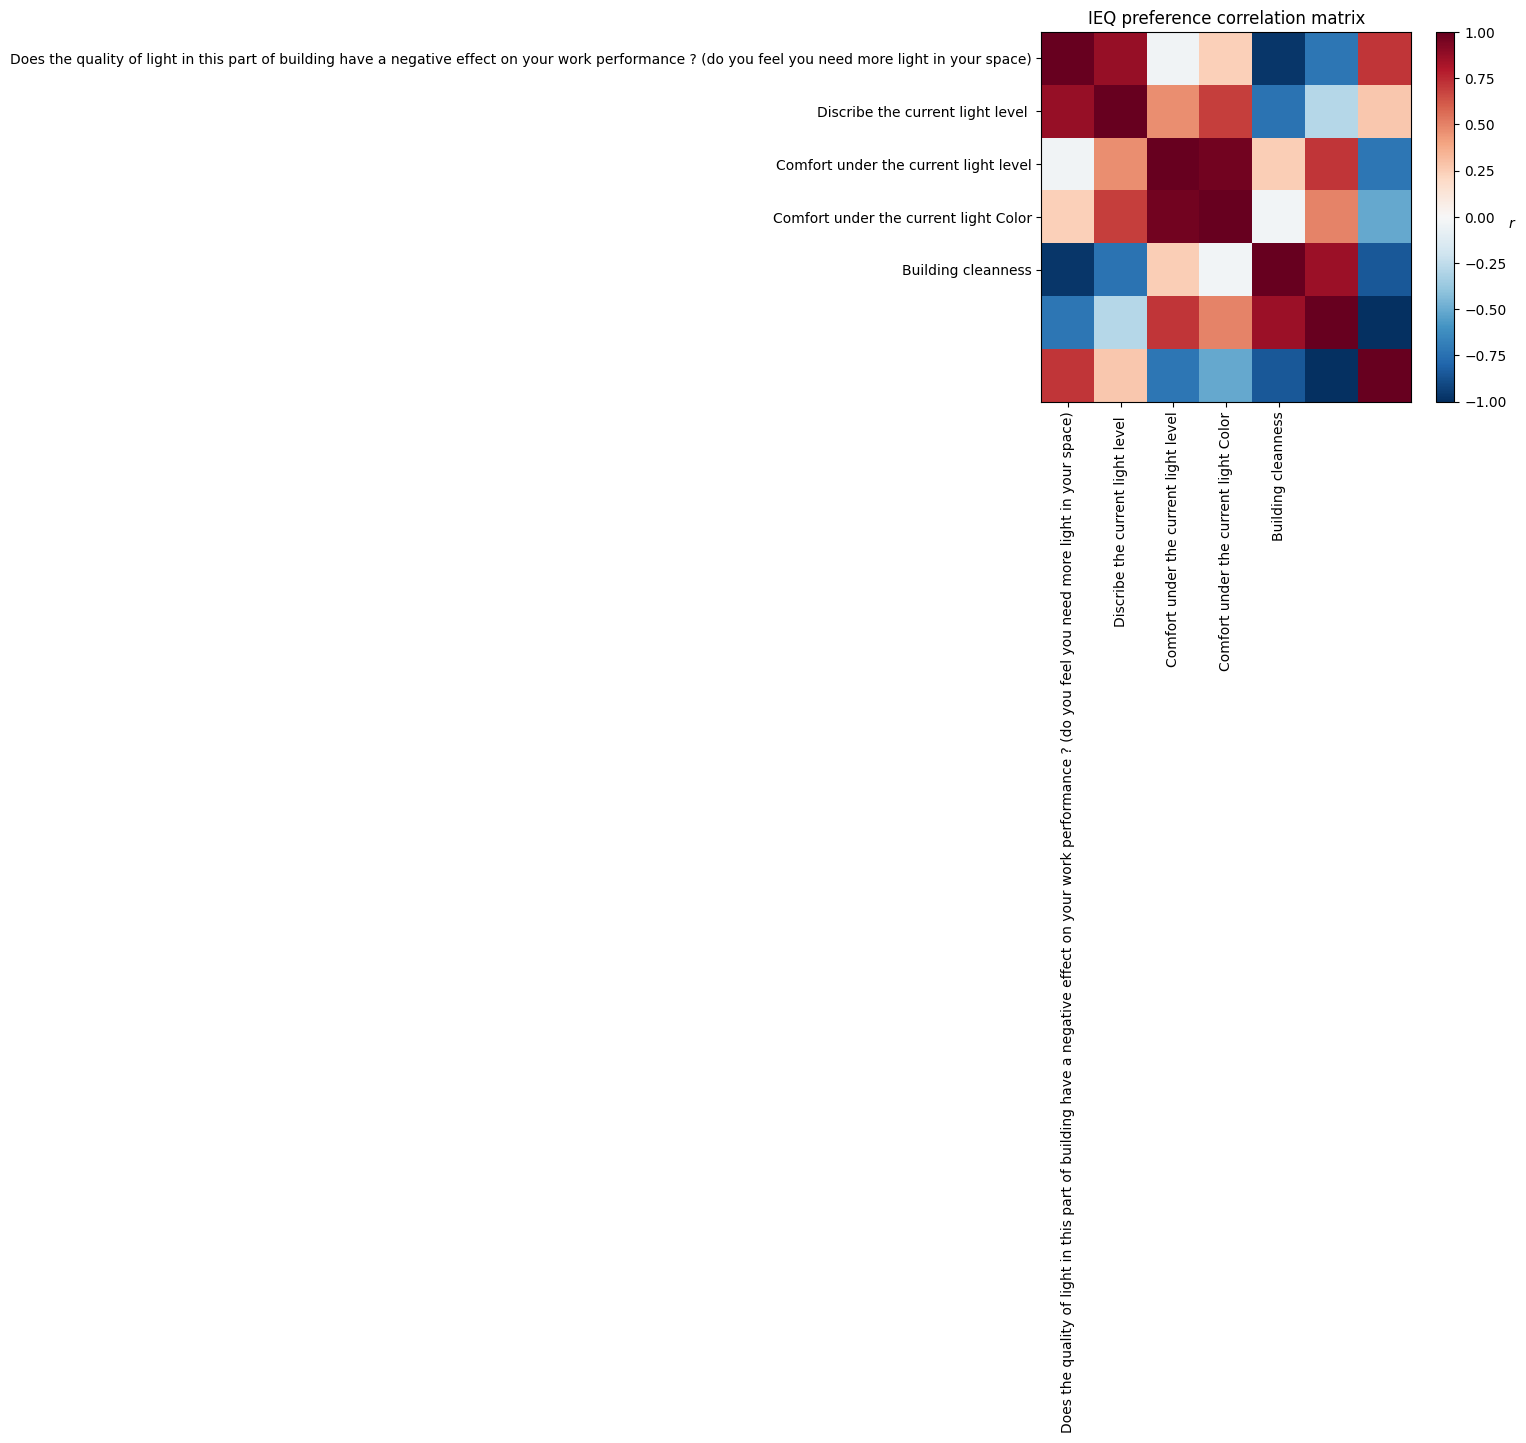

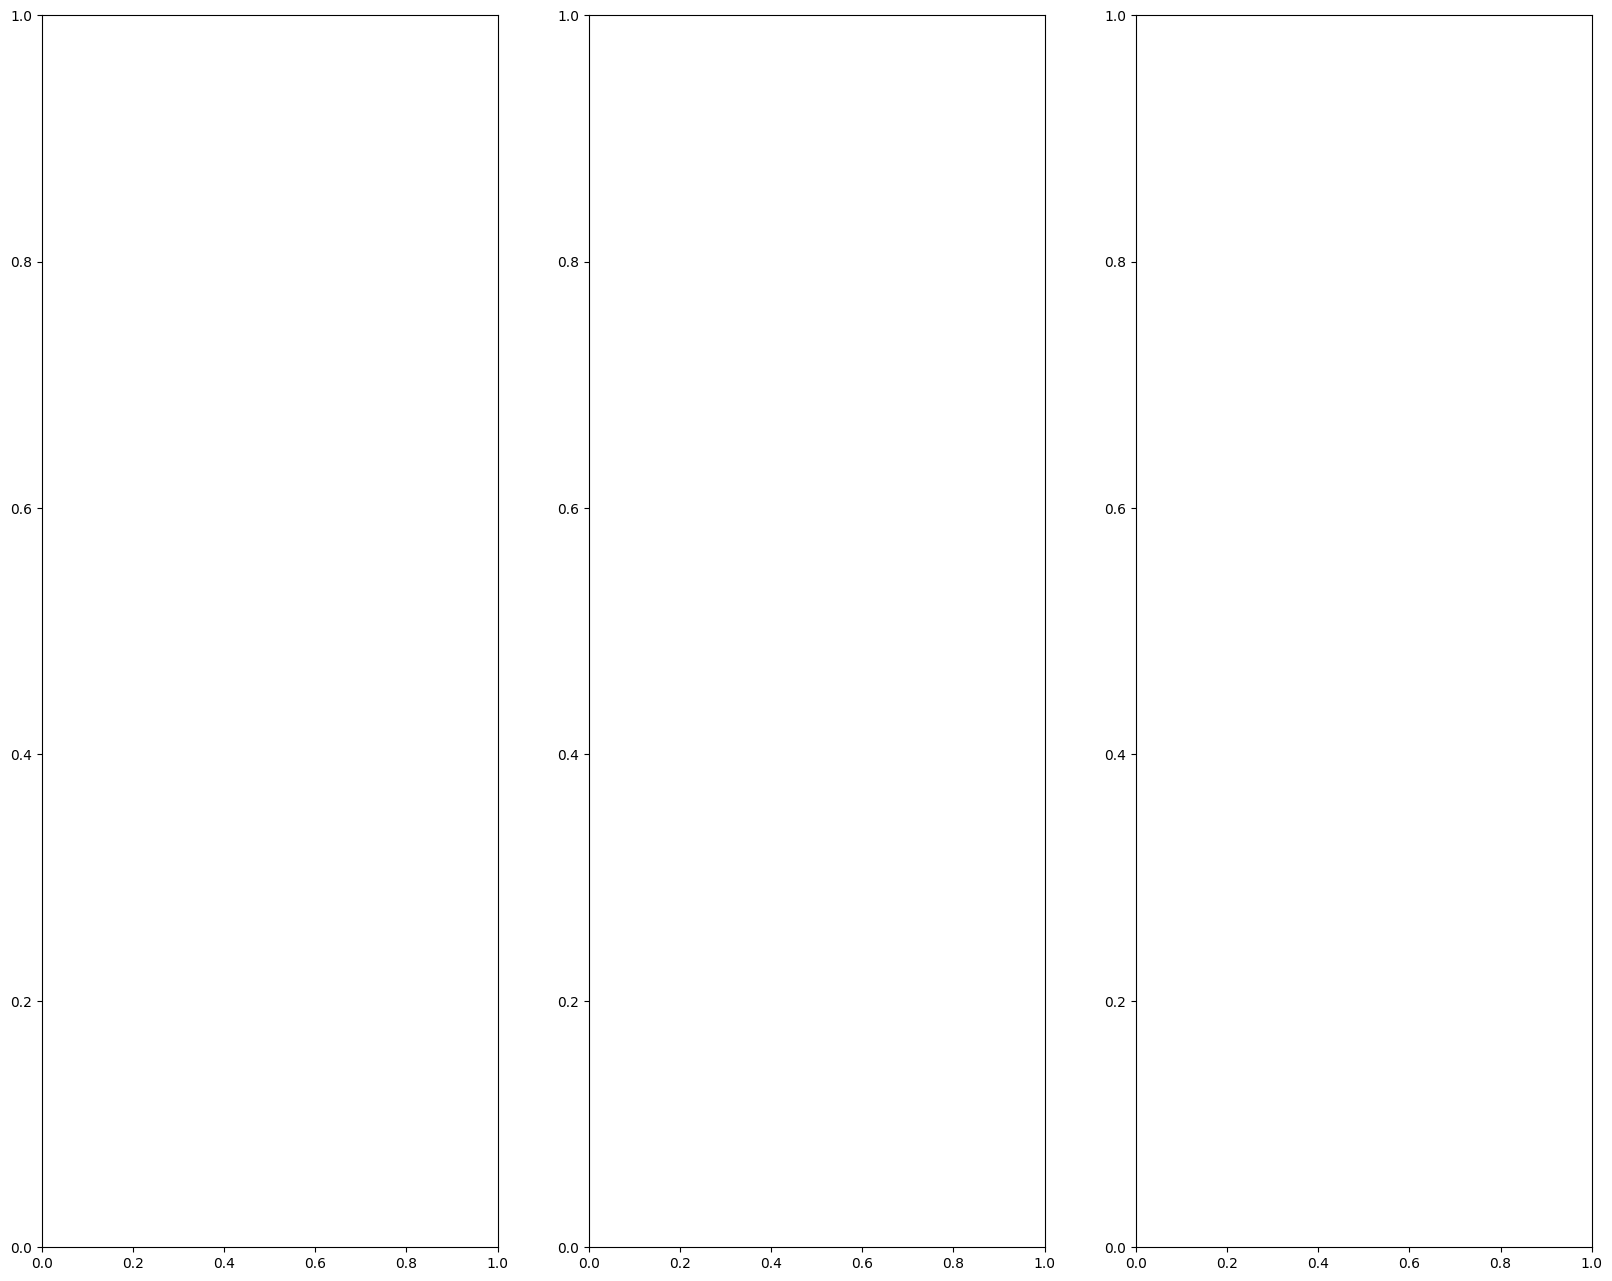

In [107]:
#Visual (comfort)
df5 = pd.DataFrame(data, columns= ['Does the quality of light in this part of building have a negative effect on your work performance ? (do you feel you need more light in your space)',
                                  'Discribe the current light level ',
                                  'Comfort under the current light level',
                                  'Comfort under the current light Color',
                                  'Building cleanness'])

feature_names = df5.iloc[0].T
print(df5)

u, s, vh = alg.svd(df5, full_matrices=False, compute_uv=True, hermitian=False)

TruncatedSVD(n_components=8, n_iter=11, random_state=42)
u.shape, s.shape, vh.shape

print('U=', np.size(u))
print('s=', s)

x = StandardScaler().fit_transform(df)
#print(x)
covariance_matrix = np.cov(x.T)
#new_covariance_matrix = covariance_matrix[~np.isnan(covariance_matrix)]

print(covariance_matrix)

pca = PCA(n_components=1)

pca.fit_transform(covariance_matrix)


eigen_values, eigen_vectors = alg.eig(covariance_matrix)
print("Eigenvector: \n",eigen_vectors,"\n")
print("Eigenvalues: \n", eigen_values, "\n")

#principalDf = pd.DataFrame(data = pca, columns = ['pca1', 'pca2'])
    
#print(feature_names)

ax = plt.axes()

im = ax.imshow(np.corrcoef(x.T), cmap="RdBu_r", vmin=-1, vmax=1)
#featurenames = feature_names.index.tolist()
featurenames = ['Does the quality of light in this part of building have a negative effect on your work performance ? (do you feel you need more light in your space)',
                'Discribe the current light level ',
                'Comfort under the current light level',
                'Comfort under the current light Color',
                'Building cleanness']
print(len(featurenames))
print(feature_names)

ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels(featurenames , rotation=90)
ax.set_yticks([0, 1, 2, 3, 4])
ax.set_yticklabels(featurenames )
print(type(feature_names))
plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
ax.set_title("IEQ preference correlation matrix")
plt.tight_layout()

n_comps = 5

methods = [('PCA', PCA()),
           ('Unrotated FA', FactorAnalysis()),
           ('Varimax FA', FactorAnalysis(rotation='varimax'))]
fig, axes = plt.subplots(ncols=len(methods), figsize=(20, 16))
